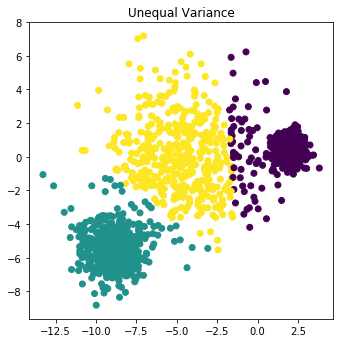

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

plt.show()

# Another example

In [19]:
from gensim.models import Word2Vec
 
from nltk.cluster import KMeansClusterer
import nltk
 
 
from sklearn import cluster
from sklearn import metrics
 
# training data
 
sentences = [['this', 'is', 'the', 'good', 'machine', 'learning', 'book'],
            ['this', 'is',  'another', 'book'],
            ['one', 'more', 'book'],
            ['this', 'is', 'the', 'new', 'post'],
          ['this', 'is', 'about', 'machine', 'learning', 'post'],  
            ['and', 'this', 'is', 'the', 'last', 'post']]
 
 
# training model
model = Word2Vec(sentences, min_count=1)
 
# get vector data
X = model[model.wv.vocab]
print("Shape of X is ",X.shape)
print("X is ",X)
 
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = model.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

print("Model similarity bw 'this' 'is'",model.similarity('this', 'is'))
 
print("Model similarity bw 'post' 'book'",model.similarity('post', 'book'))
nearest_similarity_cosmul('machine','learning','new')

print("Model similarity bw 'Machine' 'Learning'",model.similarity('machine', 'book'))
 
print (model.most_similar(positive=['machine'], negative=[], topn=2))
 
 


Shape of X is  (15, 100)
X is  [[  4.21756692e-03   8.20185698e-04   2.25887750e-03 ...,  -1.87634211e-03
    8.65891168e-04   4.24996763e-03]
 [  2.12268671e-03  -2.68867332e-03   1.18827005e-03 ...,  -2.24994449e-03
   -3.49095045e-03   1.21232786e-03]
 [ -3.54205864e-03   6.44453568e-04  -2.96902657e-03 ...,   2.66230106e-03
    2.95701274e-03  -3.23262611e-05]
 ..., 
 [  4.07588622e-03  -1.78103300e-03   4.77343099e-03 ...,   4.15026071e-03
   -2.68710835e-04   2.32474064e-03]
 [  1.46675459e-03  -2.01073033e-03   2.46170908e-03 ...,   4.49197274e-03
    1.26522977e-03  -2.06352887e-03]
 [  4.42264136e-03   1.37601944e-03   3.44331167e-03 ...,  -9.57834360e-04
    2.63620424e-03  -2.93807499e-03]]
Model similarity bw 'this' 'is' 0.00205668047442
Model similarity bw 'post' 'book' 0.0115693759267
machine is related to learning, as more is related to new
Model similarity bw 'Machine' 'Learning' -0.0133753311079
[('the', 0.1619202196598053), ('about', 0.13811369240283966)]


In [10]:
 
print(model['the'])
 
print("List of word.vocab",list(model.wv.vocab))
 
print("Lenght of model.vocab",len(list(model.wv.vocab)))
 
 

[ -3.54205864e-03   6.44453568e-04  -2.96902657e-03   1.27421416e-04
  -3.18478094e-03   6.62103994e-04   4.01638454e-06   1.78750476e-03
  -1.41076511e-03   1.41148025e-03  -2.47192057e-03   2.00217255e-04
  -2.78099463e-03  -3.39720194e-04  -4.10446664e-03  -1.20033731e-03
   1.45735010e-03   4.10139933e-03  -2.63561634e-03   1.51174632e-03
   3.99510562e-03   3.78664257e-03   3.01156356e-03  -2.27824156e-03
  -4.87642223e-03  -2.16109818e-03   1.22288079e-03   3.26632243e-03
   4.96878405e-04   3.70448851e-03  -1.04750157e-03   1.67828461e-03
  -7.54761801e-04  -4.77441680e-03   1.53970835e-03   3.63934407e-04
  -1.56272657e-03   2.85067526e-03   1.06801133e-04   4.04136488e-03
  -5.03862160e-04  -1.07780867e-03   1.92831489e-04  -3.74357612e-03
   4.10679355e-03   1.95174664e-03   2.51346221e-03   1.94798608e-03
  -3.63560254e-03  -3.61689320e-03  -4.10773559e-03  -2.61522736e-03
   2.68880185e-03  -1.97785790e-03  -4.68874443e-03  -2.17182795e-03
   3.40172881e-03  -4.34340956e-03

In [12]:
NUM_CLUSTERS=3
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)
 
words = list(model.wv.vocab)
for i, word in enumerate(words):  
    print (word + ":" + str(assigned_clusters[i]))
 
 
 
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

[2, 2, 0, 0, 0, 1, 0, 0, 2, 1, 2, 2, 2, 2, 1]
this:2
is:2
the:0
good:0
machine:0
learning:1
book:0
another:0
one:2
more:1
new:2
post:2
about:2
and:2
last:1
Cluster id labels for inputted data
[1 1 0 0 1 1 0 0 1 2 1 1 1 1 2]
Centroids data
[[ -3.26535036e-03   2.73368950e-03  -1.62468269e-03   6.01037347e-04
   -3.06361821e-04  -3.75377364e-04   1.19206775e-03   1.38824410e-03
   -1.16445159e-03  -5.76417020e-04   4.35019610e-04   1.77295972e-03
    2.13079248e-03  -1.23564724e-03  -1.13649550e-03  -9.08254937e-04
    8.94601457e-04   2.23021791e-03  -1.30345323e-03   1.89200812e-03
    1.13253319e-03   2.70499848e-03   1.41370832e-03   1.18509645e-03
   -2.53484817e-04  -3.29670322e-04   9.74907656e-04   1.12295360e-03
    7.90083664e-04   1.80691900e-03  -1.00264559e-04   2.64514610e-03
   -2.73598358e-04  -3.21807060e-03   8.69571406e-04  -5.26201562e-04
    5.61970694e-04  -7.87616242e-04  -1.48789492e-04   2.77455128e-03
   -8.79307510e-04   1.05445506e-03   1.99187011e-03   8.2018